In [1]:
# Dependencies

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
# Import modules for feature engineering and modelling
from sklearn.model_selection import train_test_split  # not used here, we use <2015 and >=2015 to split data
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

# for integer encoding using sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

# Set seed for reproducibility
seed1, seed2, seed3=101,67, 42

In [3]:
# load the data from csv to pandas dataframe
Healthcare_Provider_raw = pd.read_csv("data/Train-1542865627584.csv")
Healthcare_Beneficiary_raw = pd.read_csv("data/Train_Beneficiarydata-1542865627584.csv")
Healthcare_Inpatient_raw = pd.read_csv("data/Train_Inpatientdata-1542865627584.csv")
Healthcare_Outpatient_raw = pd.read_csv("data/Train_Outpatientdata-1542865627584.csv")

In [4]:
# glance the data
display(Healthcare_Provider_raw.head())
display(Healthcare_Beneficiary_raw.head())
display(Healthcare_Inpatient_raw.head())
display(Healthcare_Outpatient_raw.head())

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [5]:
# find the shape of the original data imported
display(Healthcare_Provider_raw.shape)
display(Healthcare_Beneficiary_raw.shape)
display(Healthcare_Inpatient_raw.shape)
display(Healthcare_Outpatient_raw.shape)

(5410, 2)

(138556, 25)

(40474, 30)

(517737, 27)

<AxesSubplot:>

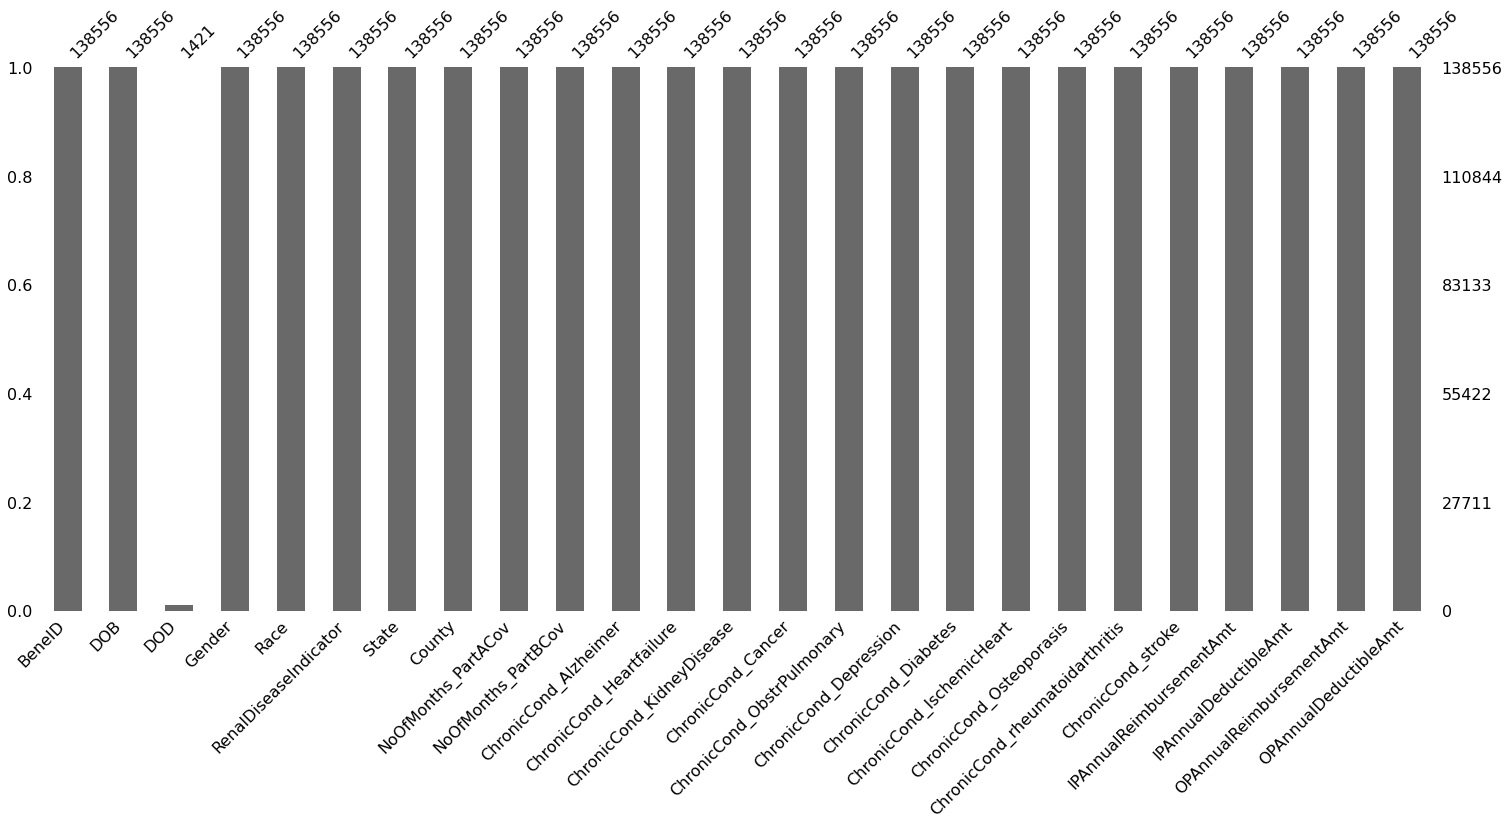

In [32]:
import missingno as msno
msno.bar(Healthcare_Beneficiary_raw)

<AxesSubplot:>

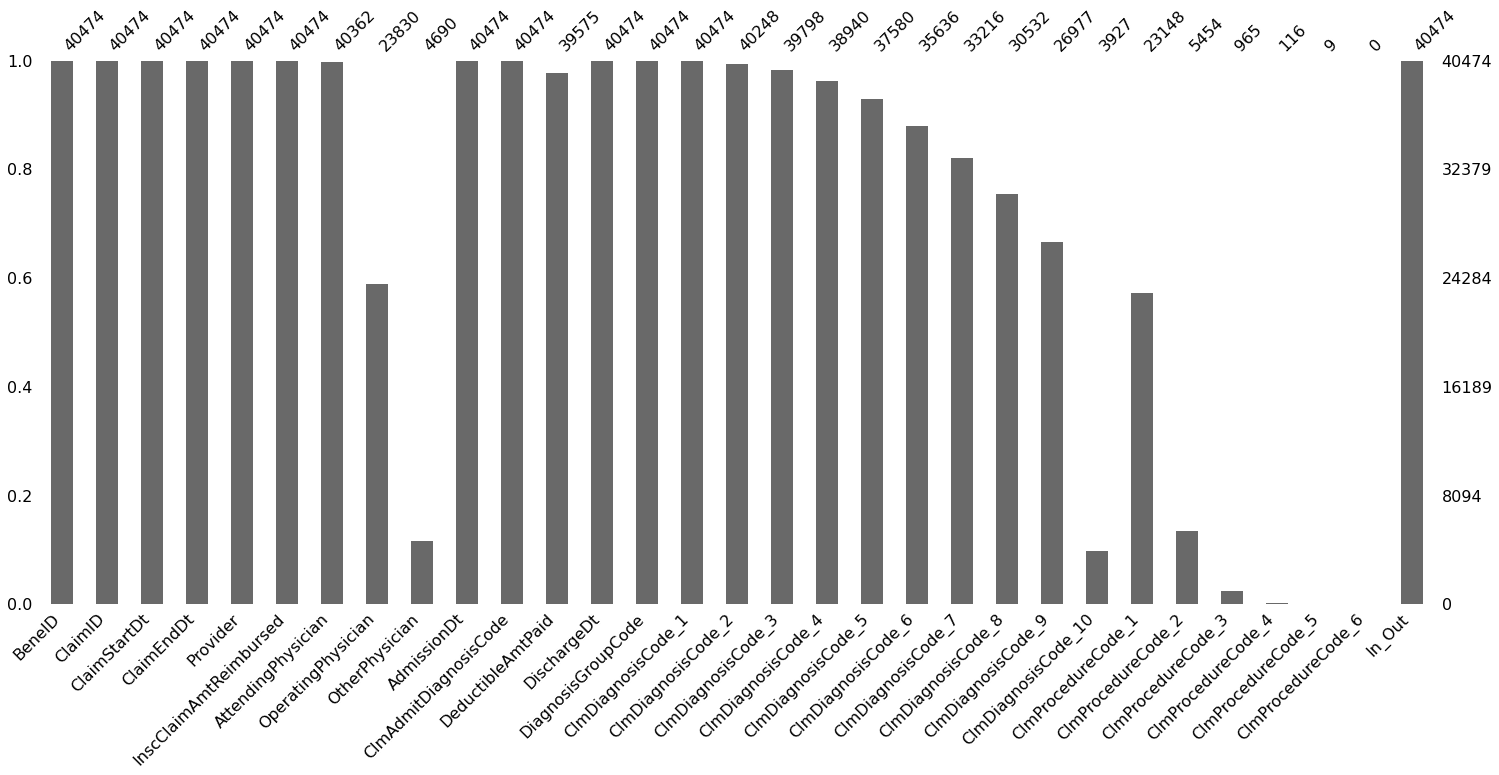

In [33]:
msno.bar(Healthcare_Inpatient_raw)

<AxesSubplot:>

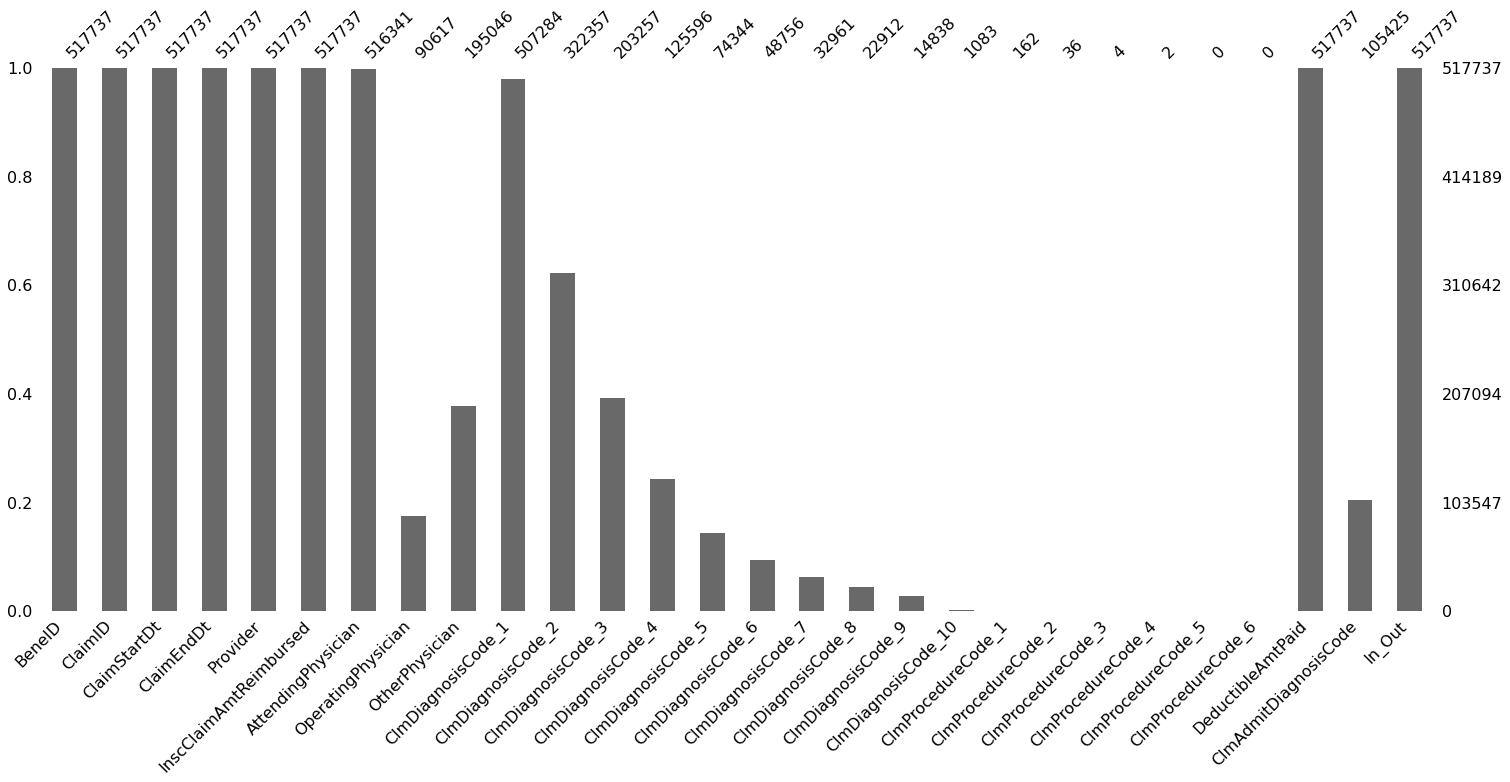

In [34]:
msno.bar(Healthcare_Outpatient_raw)

<AxesSubplot:>

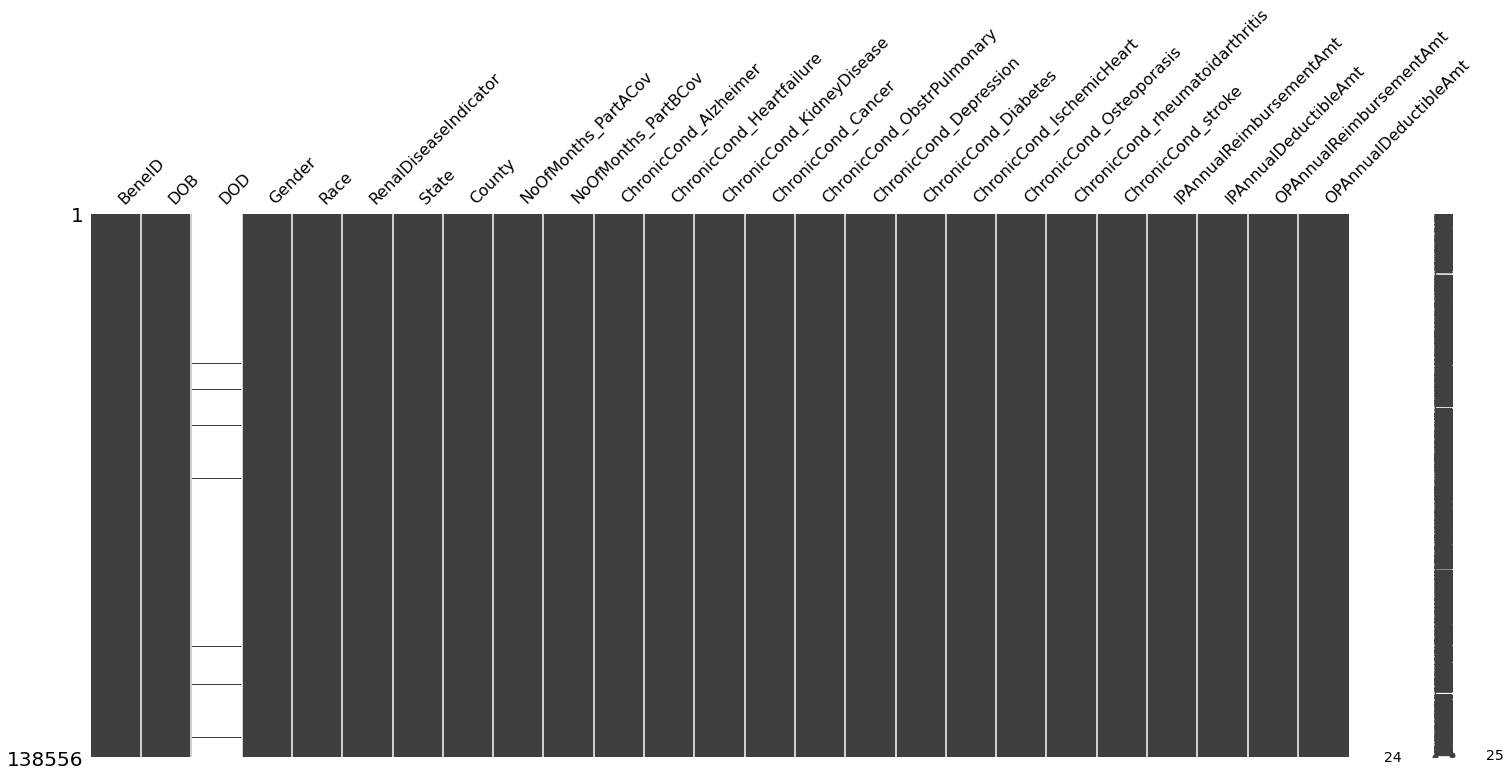

In [29]:
msno.matrix(Healthcare_Beneficiary_raw)

<AxesSubplot:>

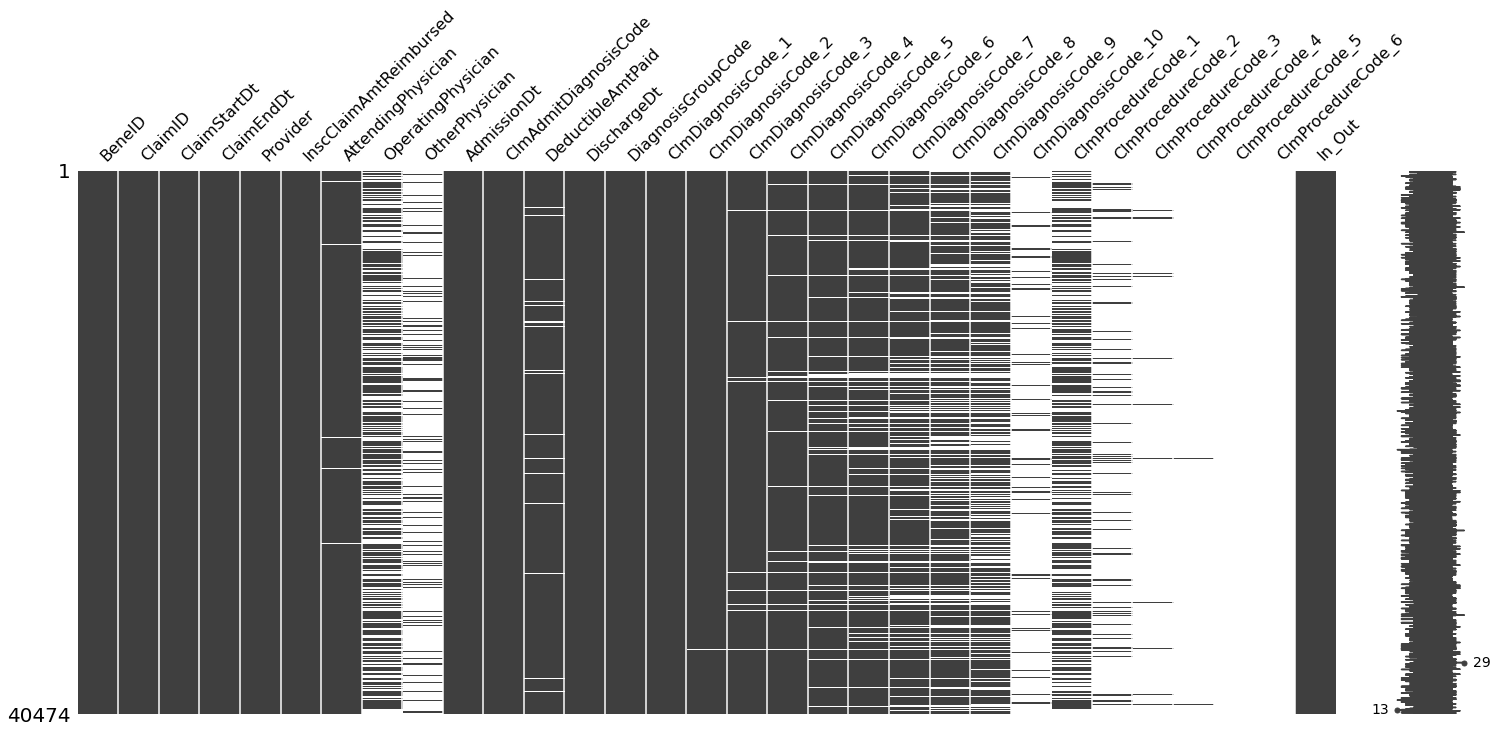

In [30]:
msno.matrix(Healthcare_Inpatient_raw)

<AxesSubplot:>

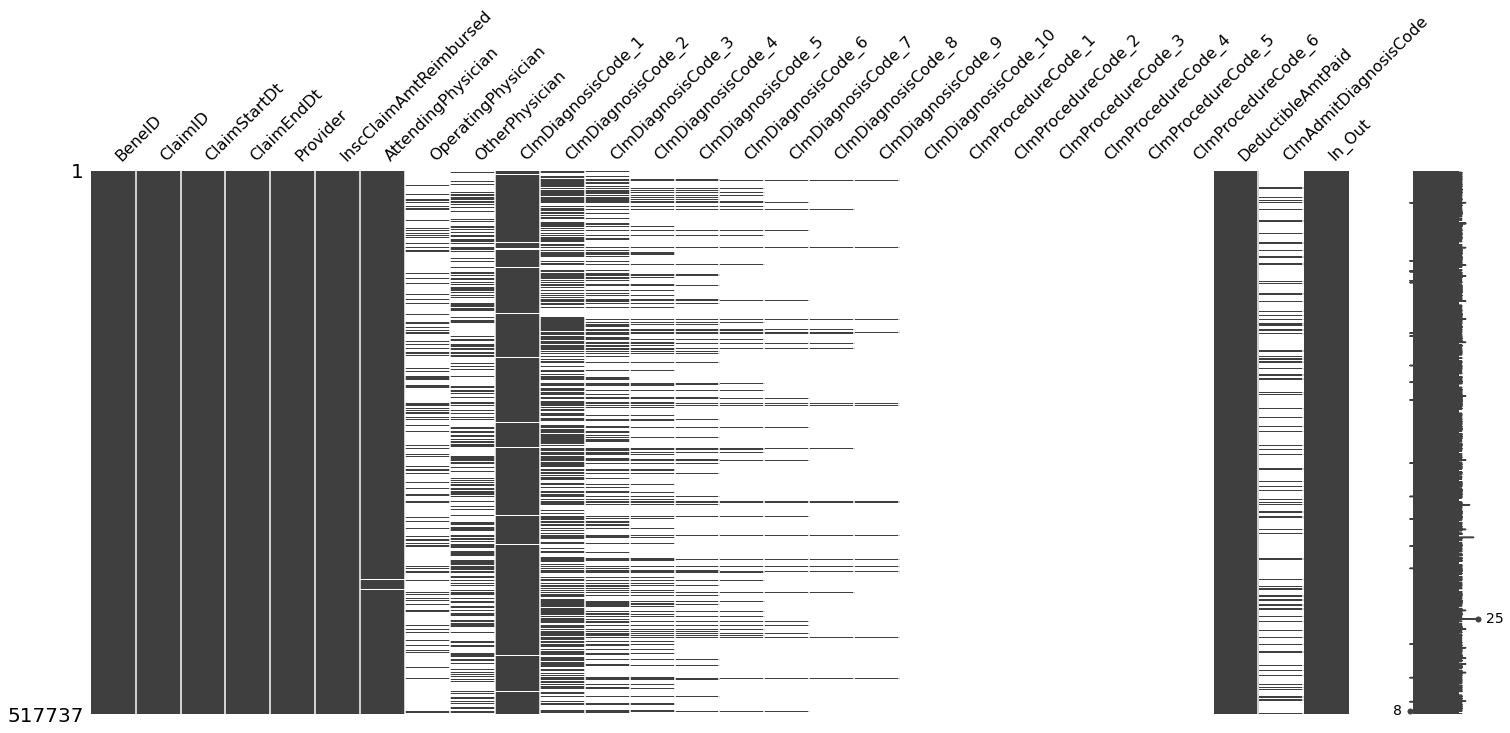

In [31]:
msno.matrix(Healthcare_Outpatient_raw)

<AxesSubplot:>

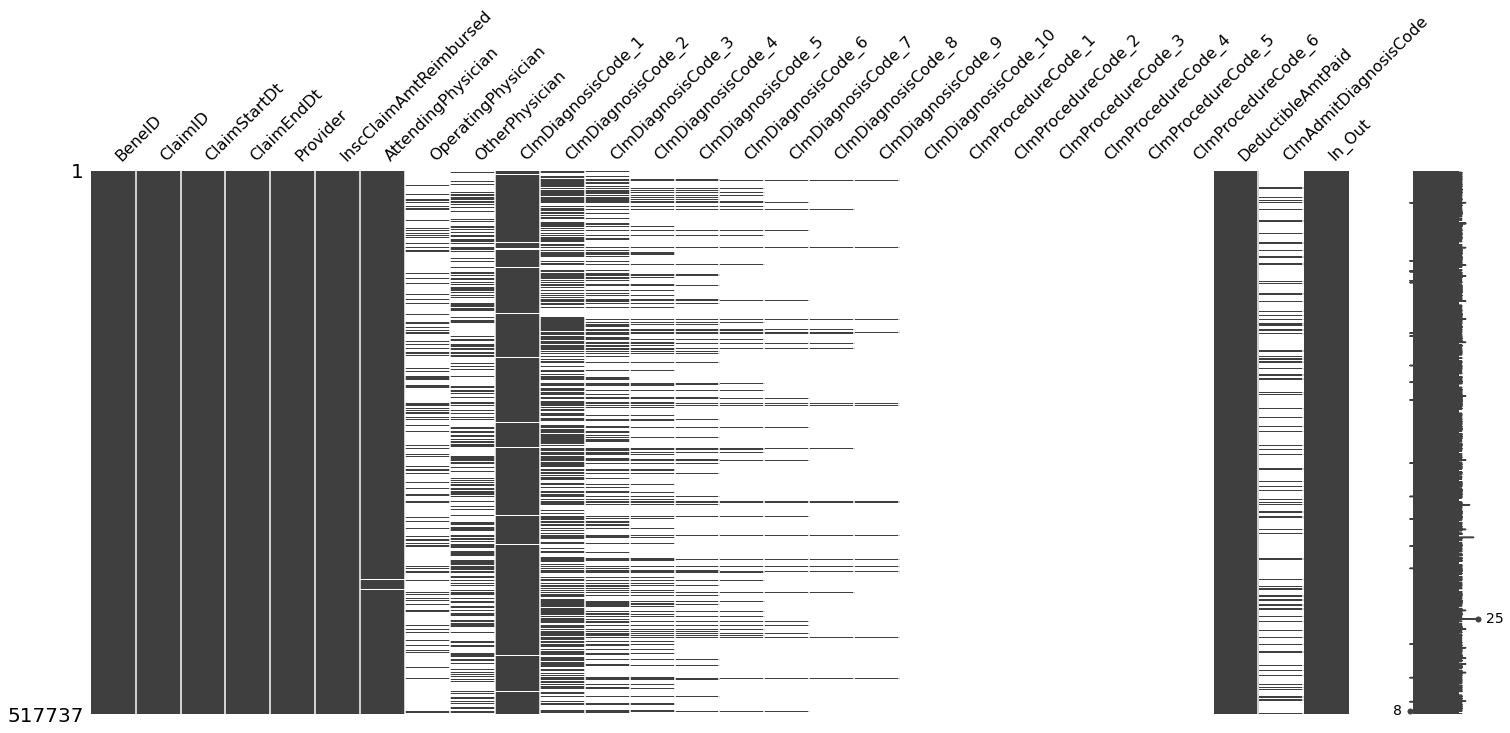

In [31]:
msno.matrix(Healthcare_Outpatient_raw)

In [6]:
# check the unique value of providers in each dataframe
len(Healthcare_Outpatient_raw['Provider'].unique()),len(Healthcare_Inpatient_raw['Provider'].unique()),len(Healthcare_Provider_raw['Provider'].unique())

(5012, 2092, 5410)

In [7]:
# Assign inpatient data as 1, outpatient data as 0

Healthcare_Inpatient_raw['In_Out']=1
Healthcare_Outpatient_raw['In_Out']=0

In [8]:
Healthcare_Inpatient_raw.columns,Healthcare_Outpatient_raw.columns

(Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
        'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
        'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
        'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
        'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
        'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
        'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
        'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
        'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
        'ClmProcedureCode_6', 'In_Out'],
       dtype='object'),
 Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
        'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
        'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
        'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosi

In [9]:
# union/concat the inpatient and outpatient data
concat_df=pd.concat([Healthcare_Inpatient_raw,Healthcare_Outpatient_raw],axis=0)
concat_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,In_Out
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,1
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,1
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,1


In [10]:
display(concat_df.columns)
display(concat_df.shape)

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'In_Out'],
      dtype='object')

(558211, 31)

In [11]:
merge_bene_df=concat_df.merge(Healthcare_Beneficiary_raw, on='BeneID', how='left')
merge_bene_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,1,2,1,1,36000,3204,60,70
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,1,2,1,1,36000,3204,60,70
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,1,2,2,1,1,5000,1068,250,320
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,1,2,1,2,2,2,21260,2136,120,100


In [12]:
merge_provider_df=merge_bene_df.merge(Healthcare_Provider_raw, on = 'Provider', how ='left')
merge_provider_df.drop_duplicates(inplace=True)
merge_provider_df

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,2,1,1,36000,3204,60,70,Yes
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,2,1,1,36000,3204,60,70,No
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,2,1,1,36000,3204,60,70,No
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,2,2,1,1,5000,1068,250,320,No
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,2,1,2,2,2,21260,2136,120,100,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,NaN,...,1,2,2,1,2,0,0,5470,1870,No
558207,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,NaN,...,1,2,2,1,2,0,0,5470,1870,No
558208,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,NaN,...,1,2,2,1,2,0,0,5470,1870,No
558209,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,...,1,2,2,1,2,0,0,5470,1870,No


In [13]:
# seperate columns into target, num, datetime, categorical

target=['PotentialFraud']
colnames=merge_provider_df.columns.to_list()
num_col_list=(merge_provider_df.describe()).columns.tolist()
datetime_col_list=['ClaimStartDt','ClaimEndDt','DischargeDt','DOB','DOD']
cat_col_list=list(set(colnames)-set(num_col_list)-set(target)-set(datetime_col_list))

In [14]:
# get a copy of the merged data, prepare change all to numerical
df_num=merge_provider_df.copy()

In [15]:
# change date column datatype to datetime

for datetime_col_name in datetime_col_list:
    df_num[datetime_col_name]=pd.to_datetime(df_num[datetime_col_name])
df_num.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,2,1,1,36000,3204,60,70,Yes
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,2,1,1,36000,3204,60,70,No
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,2,1,1,36000,3204,60,70,No
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,2,2,1,1,5000,1068,250,320,No
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,2,1,2,2,2,21260,2136,120,100,No


In [16]:
# label encode all object columns

le=LabelEncoder()

for cat_col_name in cat_col_list:
    df_num[cat_col_name]=le.fit_transform(df_num[cat_col_name])
df_num.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,9381,299052,2009-04-12,2009-04-18,3928,26000,53275,35315,46457,134,...,1,1,2,1,1,36000,3204,60,70,Yes
1,9381,471344,2009-08-31,2009-09-02,3923,5000,4951,2132,46457,275,...,1,1,2,1,1,36000,3204,60,70,No
2,9381,491764,2009-09-17,2009-09-20,4034,5000,40843,35315,5201,292,...,1,1,2,1,1,36000,3204,60,70,No
3,9489,226452,2009-02-14,2009-02-22,1125,5000,39020,23575,14717,77,...,1,2,2,1,1,5000,1068,250,320,No
4,9518,450337,2009-08-13,2009-08-30,4490,10000,45475,25118,46457,257,...,2,1,2,2,2,21260,2136,120,100,No


In [17]:
# transform target to binary code

df_num['PotentialFraud']=df_num['PotentialFraud'].map(lambda x:1 if (x=='Yes' or x==1) else 0)

df_num.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,9381,299052,2009-04-12,2009-04-18,3928,26000,53275,35315,46457,134,...,1,1,2,1,1,36000,3204,60,70,1
1,9381,471344,2009-08-31,2009-09-02,3923,5000,4951,2132,46457,275,...,1,1,2,1,1,36000,3204,60,70,0
2,9381,491764,2009-09-17,2009-09-20,4034,5000,40843,35315,5201,292,...,1,1,2,1,1,36000,3204,60,70,0
3,9489,226452,2009-02-14,2009-02-22,1125,5000,39020,23575,14717,77,...,1,2,2,1,1,5000,1068,250,320,0
4,9518,450337,2009-08-13,2009-08-30,4490,10000,45475,25118,46457,257,...,2,1,2,2,2,21260,2136,120,100,0


In [18]:
df_num.info()

# will drop column ClmProcedureCode_6, since it is all Null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 56 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   BeneID                           558211 non-null  int32         
 1   ClaimID                          558211 non-null  int32         
 2   ClaimStartDt                     558211 non-null  datetime64[ns]
 3   ClaimEndDt                       558211 non-null  datetime64[ns]
 4   Provider                         558211 non-null  int32         
 5   InscClaimAmtReimbursed           558211 non-null  int64         
 6   AttendingPhysician               558211 non-null  int32         
 7   OperatingPhysician               558211 non-null  int32         
 8   OtherPhysician                   558211 non-null  int32         
 9   AdmissionDt                      558211 non-null  int32         
 10  ClmAdmitDiagnosisCode            558211 non-

In [20]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
BeneID,558211.0,69139.488502,40014.023951,0.0,34397.50,69006.0,103920.5,138555.0
ClaimID,558211.0,279105.000000,161141.779895,0.0,139552.50,279105.0,418657.5,558210.0
Provider,558211.0,2582.298185,1542.465043,0.0,1125.00,2622.0,3914.0,5409.0
InscClaimAmtReimbursed,558211.0,997.012133,3821.534891,0.0,40.00,80.0,300.0,125000.0
AttendingPhysician,558211.0,40764.226989,23766.318403,0.0,20417.00,40038.0,61643.0,82063.0
OperatingPhysician,558211.0,31666.310809,8560.068285,0.0,35315.00,35315.0,35315.0,35315.0
OtherPhysician,558211.0,37939.342220,13976.363919,0.0,32125.00,46457.0,46457.0,46457.0
AdmissionDt,558211.0,383.842017,57.980684,0.0,398.00,398.0,398.0,398.0
ClmAdmitDiagnosisCode,558211.0,3639.199795,958.048291,0.0,4056.00,4098.0,4098.0,4098.0
DeductibleAmtPaid,557312.0,78.421085,274.016812,0.0,0.00,0.0,0.0,1068.0


In [22]:
for datetime_col_name in datetime_col_list:
    print(datetime_col_name,min(df_num[datetime_col_name]), max(df_num[datetime_col_name]))

ClaimStartDt 2008-11-27 00:00:00 2009-12-31 00:00:00
ClaimEndDt 2008-12-28 00:00:00 2009-12-31 00:00:00
DischargeDt 2009-01-01 00:00:00 2009-12-31 00:00:00
DOB 1909-01-01 00:00:00 1983-12-01 00:00:00
DOD NaT NaT


<AxesSubplot:>

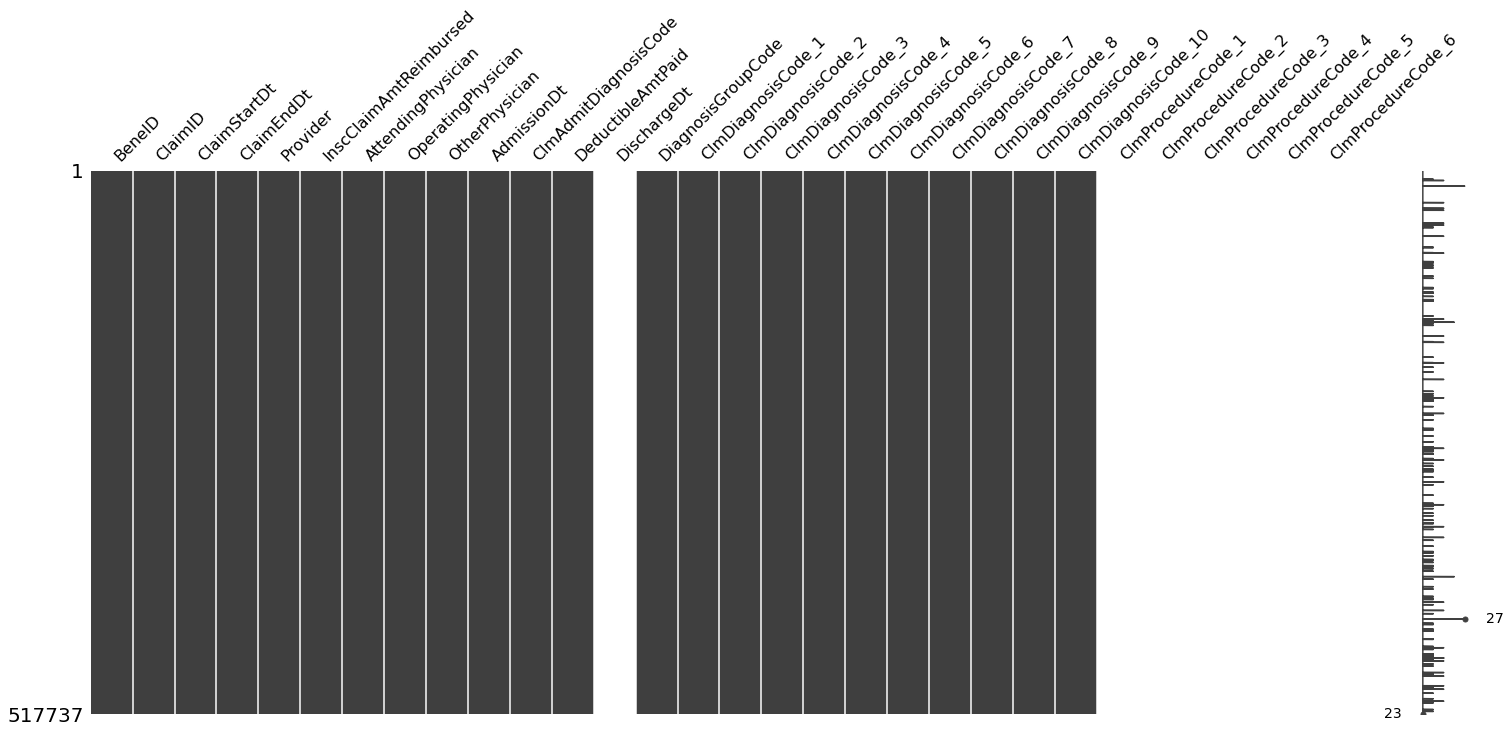

In [44]:
# out patient
msno.matrix((df_num[df_num['In_Out']==0]).iloc[:,:30])

<AxesSubplot:>

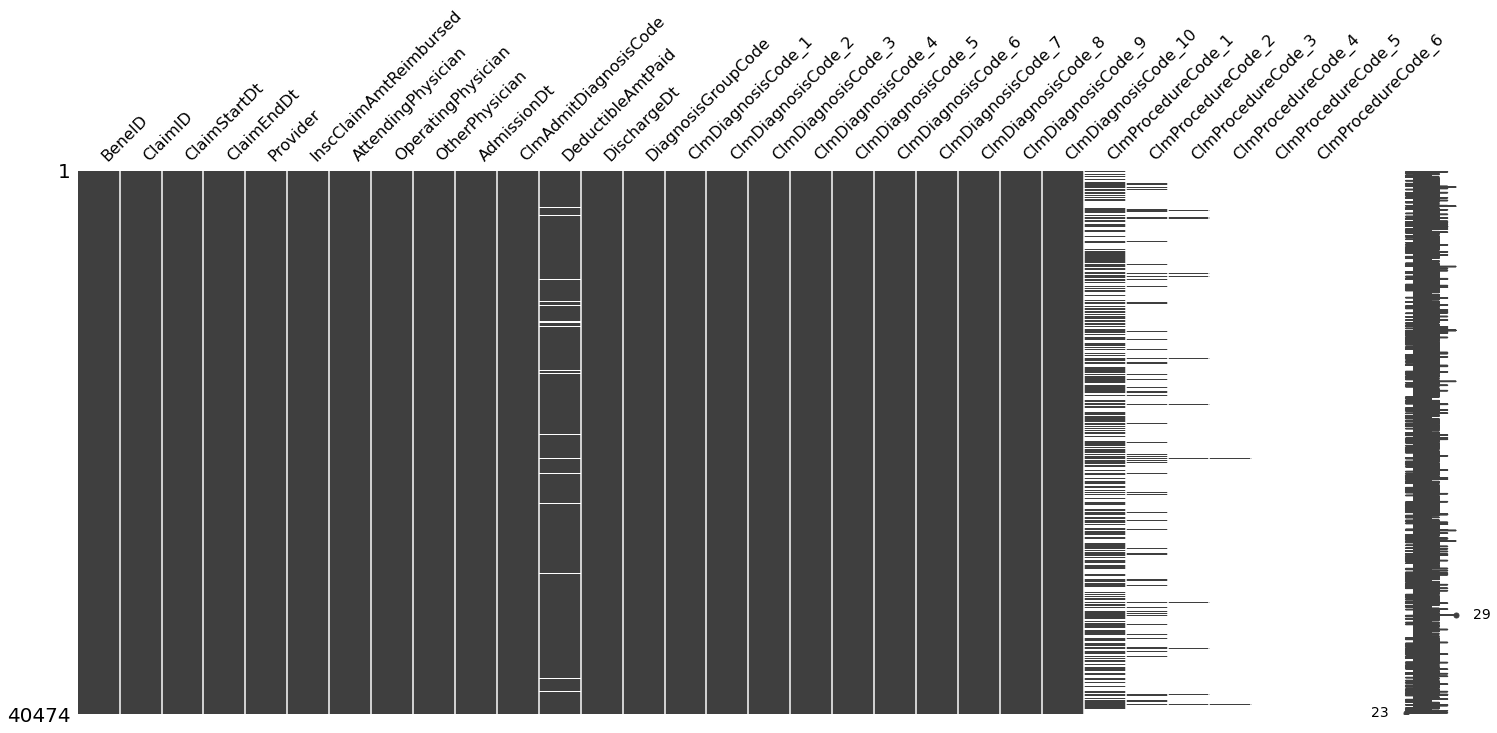

In [45]:
# inpatient
msno.matrix((df_num[df_num['In_Out']==1]).iloc[:,:30])